
<font size = 4 color='#663399'>
<b>Learning Goals</b></font>

<font color = '#663399' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = '#663399' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = '#663399' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = '#663399' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='#663399'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='#663399'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font size = 5 color='#663399'>1. BERT Model </font>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/5train.csv", index_col='id')
data

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [ ]:
data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
data['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

> <font size = 4 color='#663399'>Dropping the `location` column since it is cluttered and offers little information.</font>

In [ ]:
data = data.drop(['location'], axis=1) 

> <font size = 4 color='#663399'>Checking the missing keywords' causes.</font>


In [ ]:
data[data['keyword'].isnull()]['target'].value_counts()

1    42
0    19
Name: target, dtype: int64

In [ ]:
data[data['keyword'].isnull()]

,keyword,text,target
id,,,
1,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
10869,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


> <font size = 4 color='#663399'>There is no obvious connection between the `text`or `target` columns and the missing values. Therefore I'll be discarding these because there are only 61 rows out of 7613 with missing values.</font>

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(7552, 3)

In [ ]:
data['label'] = data['target']
data = data.drop(['target'],axis=1)
data

,keyword,text,label
id,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,Crying out for more! Set me ablaze,0
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...
10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0
10831,wrecked,Three days off from work and they've pretty mu...,0
10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0


> <font size = 4 color='#663399'>Encoding the `keyword` column.</font>

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['keyword'] = enc.fit_transform(data['keyword'])

In [ ]:
data.corr()

,keyword,label
keyword,1.000000,0.055841
label,0.055841,1.000000


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file to

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(data.drop(['keyword'], axis=1))

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True)

In [ ]:
tokenized_tweets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
tokenized_tweets.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'id': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_m

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_tweets,
    tokenizer=tokenizer,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, text. If id, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4720
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than usin

Step,Training Loss
500,0.433700
1000,0.317500
1500,0.224700
2000,0.161300
2500,0.118500
3000,0.079300
3500,0.076400
4000,0.050200
4500,0.040900


Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-500
Configuration saved in /content/drive/MyDrive/results/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/results/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-1000
Configuration saved in /content/drive/MyDrive/results/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/results/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-1500
Configuration saved in /content/drive/MyDri

TrainOutput(global_step=4720, training_loss=0.1608507840310113, metrics={'train_runtime': 1304.5172, 'train_samples_per_second': 57.891, 'train_steps_per_second': 3.618, 'total_flos': 3250671311208960.0, 'train_loss': 0.1608507840310113, 'epoch': 10.0})

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_tok

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.25.1",
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/pytorch_model.bin
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=15,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_tweets,
    tokenizer=tokenizer,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, text. If id, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 15
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 7080
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than usin

Step,Training Loss
500,0.432400
1000,0.322700
1500,0.230200
2000,0.171200
2500,0.125700
3000,0.083500
3500,0.077200
4000,0.059700
4500,0.049200
5000,0.039800


Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-500
Configuration saved in /content/drive/MyDrive/results/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/results/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-1000
Configuration saved in /content/drive/MyDrive/results/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/results/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-1500
Configuration saved in /content/drive/MyDri

TrainOutput(global_step=7080, training_loss=0.12050401238398363, metrics={'train_runtime': 1974.1691, 'train_samples_per_second': 57.381, 'train_steps_per_second': 3.586, 'total_flos': 4875826077962880.0, 'train_loss': 0.12050401238398363, 'epoch': 15.0})

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_tweets,
    tokenizer=tokenizer,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: id, text, token_type_ids. If id, text, token_type_ids are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 10
  Instantaneous bat

Step,Training Loss
500,0.430400
1000,0.330500
1500,0.236100
2000,0.183200
2500,0.132500
3000,0.107600
3500,0.088700
4000,0.062700
4500,0.056300


Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-500
Configuration saved in /content/drive/MyDrive/results/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/results/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-1000
Configuration saved in /content/drive/MyDrive/results/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/results/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /content/drive/MyDrive/results/checkpoint-1500
Configuration saved in /content/drive/MyDri

TrainOutput(global_step=4720, training_loss=0.17495437597824356, metrics={'train_runtime': 659.3242, 'train_samples_per_second': 114.542, 'train_steps_per_second': 7.159, 'total_flos': 1636601593545216.0, 'train_loss': 0.17495437597824356, 'epoch': 10.0})

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/5test.csv")
data_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
dataset_test = Dataset.from_pandas(data_test.drop(['keyword', 'location', 'id'], axis=1))

In [ ]:
tokenized_test = dataset_test.map(preprocess_function, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

In [ ]:
tokenized_test.shape

(3263, 3)

In [ ]:
predictions, labels, metrics = trainer.predict(tokenized_test)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 16


In [ ]:
np.argmax(predictions, axis=-1)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
data_test['target'] = np.argmax(predictions, axis=-1)

In [ ]:
data_test['target'].value_counts()

0    1877
1    1386
Name: target, dtype: int64

In [ ]:
data_test.drop(['keyword','location','text'],axis=1).to_csv("/content/drive/MyDrive/5sample_submission.csv", index=False)

<font size = 5 color='#663399'>1.1 Result Table</font>

| Model | Parameters | Training Time | F1 Score |
| :-: | :-: | :-: | :-: |
| distilbert | 10 epochs 2e-6 l_rate | 33 min. | 0.85 |
| bert | 10 epochs 2e-6 l_rate | 22 min. | 0.82 |
| distilbert | 10 epochs 2e-6 l_rate | 11 min. | 0.8 |

<font size = 5 color='#663399'>2. K-Means Clustering</font>

In [ ]:
!pip install transformers
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
logging.set_verbosity(logging.ERROR)
message_embeddings = embed(data.text.values)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(message_embeddings)

clusters = km.labels_.tolist()
u_labels = np.unique(clusters)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data_data = message_embeddings
pca = PCA(2)
 
data_new = pca.fit_transform(data_data)

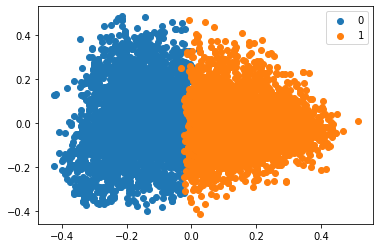

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in u_labels:
    plt.scatter(data_new[clusters == i , 0] , data_new[clusters == i , 1] , label = i)
    
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
print('ARI '+ str(metrics.adjusted_rand_score(data['target'], km.labels_)))
print()
print('AMI '+ str(metrics.adjusted_mutual_info_score(data['target'], km.labels_, average_method='arithmetic')))
print()
print('Homogenity '+ str(metrics.homogeneity_score(data['target'], km.labels_)))
print()
print('Completeness '+ str(metrics.completeness_score(data['target'], km.labels_)))
print()
print('V-measure '+ str(metrics.v_measure_score(data['target'], km.labels_)))       

ARI 0.1950250794618267

AMI 0.15204735290251317

Homogenity 0.15329438902779824

Completeness 0.1509811727843154

V-measure 0.15212898793997495
